In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
energydata = pd.read_csv('energydata_complete.csv')
# energydata.head()


<AxesSubplot:xlabel='T1', ylabel='Appliances'>

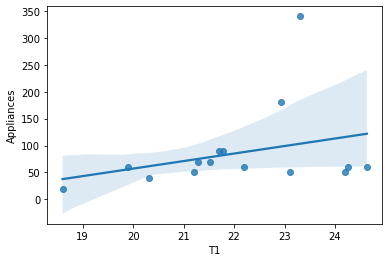

In [84]:
simple_plot = energydata[['T1','Appliances']].sample(15, random_state=2)

# Regression plot
sns.regplot(x="T1", y="Appliances", data=simple_plot)

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

T2 = energydata[['T2']]
T6 = energydata[['T6']]

x_train, x_test, y_train, y_test = train_test_split(T2, T6, test_size= 0.3, random_state= 1)
linear_model = LinearRegression()
# Fit the model to the training dataset
linear_model.fit(x_train, y_train)
# Obtain predictions
predicted_values = linear_model.predict(x_test)

from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2)


0.65

In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
energydata_new = energydata.drop(columns=['date','lights'])
normalised_data = pd.DataFrame(scaler.fit_transform(energydata_new), columns=energydata_new.columns)
normalised_data['Appliances']

target_data = energydata_new['Appliances']


x_train, x_test, y_train, y_test = train_test_split(normalised_data, target_data, test_size= 0.3, random_state=42)

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)


predicted_values = linear_model.predict(x_test)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 2)


0.0

In [87]:
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)

0.0

In [88]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.0

In [96]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2)

1.0

In [89]:
def get_weights_energydata(model, feat, col_name) :
#this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_energydata = pd.DataFrame(weights).reset_index()
    weights_energydata.columns = ['Features', col_name]
    weights_energydata[col_name].round(3)
    return weights_energydata

In [90]:
linear_model_weights = get_weights_energydata(linear_model, x_train, 'Linear_Model_Weight')
linear_model_weights.sort_values(by=['Linear_Model_Weight'],ascending=True)

# print(linear_model_weights)

,Features,Linear_Model_Weight
0,T2,-3.867964e-13
1,RH_2,-3.323334e-13
2,RH_6,-3.228580e-13
3,RH_3,-2.729098e-13
4,T8,-2.719114e-13
5,Press_mm_hg,-2.583051e-13
6,T3,-1.918566e-13
7,T_out,-1.670122e-13
8,T9,-1.492419e-13
9,RH_1,-8.888666e-14


In [91]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha= 0.4)
ridge_reg.fit(x_train, y_train)

predicted_values = ridge_reg.predict(x_test)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)



0.34

In [92]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha= 0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [93]:
def get_weights_energydata(model, feat, col_name) :
#this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_energydata = pd.DataFrame(weights).reset_index()
    weights_energydata.columns = ['Features', col_name]
    weights_energydata[col_name].round(3)
    return weights_energydata

In [94]:
lasso_model_weights = get_weights_energydata(lasso_reg, x_train, 'Lasso_Model_Weight')
print(lasso_model_weights)

       Features  Lasso_Model_Weight
0            T7            0.000000
1     Tdewpoint            0.000000
2    Visibility            0.000000
3     Windspeed            0.000000
4        RH_out           -0.000000
5   Press_mm_hg           -0.000000
6         T_out            0.000000
7          RH_9           -0.000000
8            T9            0.000000
9          RH_8           -0.000000
10           T8            0.000000
11         RH_7           -0.000000
12          rv1           -0.000000
13          rv2           -0.000000
14           T6            0.000000
15         RH_5            0.000000
16           T5            0.000000
17         RH_4            0.000000
18           T4            0.000000
19         RH_3            0.000000
20           T3            0.000000
21         RH_2           -0.000000
22           T2            0.000000
23         RH_1            0.000000
24           T1            0.000000
25         RH_6           -0.000000
26   Appliances         1069

In [69]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha= 0.001)
lasso_reg.fit(x_train, y_train)
predicted_values = lasso_reg.predict(x_test)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.01